In [88]:
#load all modules/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

pd.set_option('display.max_columns', 500)

In [89]:
#will lowercase all items in a list and return the lowercased one
def lowercase_columns(list):
    new_list = []

    for item in list:
        new_list.append(item.lower())
    
    return new_list

In [90]:
#Problem statement
#Most students in the US are in public schools and people complain public is not up to par
#what factors impact performance in public schools?

## Data Collection

In [91]:
#QUESTION 2
data = pd.read_csv('Chicago_Public_Schools_-_School_Progress_Reports_SY1819.csv')
data2 = pd.read_csv('Chicago_Public_Schools_-_School_Profile_Information_SY1819.csv')

## Data Preparation

In [92]:
#lower casing all of the columns in data
data.columns = lowercase_columns(data.columns)
data2.columns = lowercase_columns(data2.columns)

In [93]:
#drop every column that has growth in it, we're not interested in growth, only attainment
for column in data.columns:
    if 'growth' in column:
        data.drop(column, axis = 1, inplace=True)

In [94]:
#dropping columns due to..
#1.too much garbage data
#2.too many missing values
#3.irrelevant data
columns_to_drop = [
    'long_name',
    'address',
    'city',
    'state',
    'phone',
    'fax',
    'cps_school_profile',
    'website',
    'progress_report_year',
    'blue_ribbon_award_year',
    'spot_light_award_year',
    'improvement_award_year',
    'excellence_award_year',
    'student_attainment_description',
    'school_survey_student_response_rate_avg_pct',
    'School_Survey_Teacher_Response_Rate_Avg_Pct',
    'School_Survey_Parent_Response_Rate_Avg_Pct',
    'Suspensions_Per_100_Students_Year_2_Pct',
    'Suspensions_Per_100_Students_Avg_Pct',
    'Misconducts_To_Suspensions_Year_2_Pct',
    'Misconducts_To_Suspensions_Avg_Pct',
    'Average_Length_Suspension_Year_2_Pct',
    'Average_Length_Suspension_Avg_Pct',
    'Behavior_Discipline_Year_2',
    'Student_Attendance_Year_2_Pct',
    'Teacher_Attendance_Year_2_Pct',
    'One_Year_Dropout_Rate_Year_1_Pct',
    'One_Year_Dropout_Rate_Year_2_Pct',
    'One_Year_Dropout_Rate_Avg_Pct',
    'Freshmen_On_Track_School_Pct_Year_2',
    'Student_Attendance_Avg_Pct',
    'Teacher_Attendance_Avg_Pct',
    'Freshmen_On_Track_CPS_Pct_Year_2',
    'Freshmen_On_Track_School_Pct_Year_1',
    'Freshmen_On_Track_CPS_Pct_Year_1',
    'Graduation_4_Year_School_Pct_Year_2',
    'Graduation_4_Year_CPS_Pct_Year_2',
    'Graduation_4_Year_School_Pct_Year_1',
    'Graduation_4_Year_CPS_Pct_Year_1',
    'Graduation_5_Year_School_Pct_Year_2',
    'Graduation_5_Year_CPS_Pct_Year_2',
    'Graduation_5_Year_School_Pct_Year_1',
    'Graduation_5_Year_CPS_Pct_Year_1',
    'College_Enrollment_School_Pct_Year_2',
    'College_Enrollment_CPS_Pct_Year_2',
    'College_Enrollment_School_Pct_Year_1',
    'College_Enrollment_CPS_Pct_Year_1',
    'College_Persistence_School_Pct_Year_2',
    'College_Persistence_CPS_Pct_Year_2',
    'College_Persistence_School_Pct_Year_1',
    'College_Persistence_CPS_Pct_Year_1',
    'State_School_Report_Card_URL',
    'Other_Metrics_Year_1',
    'Other_Metrics_Year_2',
    'Mobility_Rate_Pct',
    'Culture_Climate_Description',
    'Empty_Progress_Report_Message',
    'School_Survey_Rating_Description',
    'Supportive_School_Award_Desc',
    'Parent_Survey_Results_Year',
    'SAT_Grade_11_Score_CPS_Avg',
    'PSAT_Grade_9_Score_School_Avg',
    'PSAT_Grade_10_Score_School_Avg',
    'SAT_Grade_11_Score_School_Avg',
    'Attainment_PSAT_Grade_9_School_Pct',
    'Attainment_PSAT_Grade_9_School_Lbl',
    'Attainment_PSAT_Grade_10_School_Pct',
    'Attainment_PSAT_Grade_10_School_Lbl',
    'Attainment_SAT_Grade_11_School_Pct',
    'Attainment_SAT_Grade_11_School_Lbl',
    'Attainment_All_Grades_School_Pct',
    'Attainment_All_Grades_School_Lbl',
    'Behavior_Discipline_Year_1',
    'Excelerate_Award_Gold_Year',
    'Attainment_Reading_Lbl_ES',
    'Attainment_Math_Lbl_ES',
    'Healthy_School_Certification',
    'Healthy_School_Certification_Description',
    'Creative_School_Certification_Description',
    'Suspensions_Per_100_Students_Year_1_Pct',
    'Misconducts_To_Suspensions_Year_1_Pct',
    'Average_Length_Suspension_Year_1_Pct',
    'Progress_Toward_Graduation_Year_1',
    'Progress_Toward_Graduation_Year_2',
    'school_survey_quality_of_facilities',
    'school_survey_parent_teacher_partnership',
    'school_survey_school_community',
    'School_Survey_Student_Response_Rate_Pct',
    'School_Survey_Teacher_Response_Rate_Pct',
    'School_Survey_Parent_Response_Rate_Pct',
    'Supportive_School_Award'
]

columns_to_drop = lowercase_columns(columns_to_drop)

#drop the columns above from the dataset
data.drop(columns_to_drop, axis=1, inplace=True)

In [95]:
data.head(5)

,school_id,short_name,school_type,primary_category,zip,student_attainment_rating,attainment_reading_pct_es,attainment_math_pct_es,culture_climate_rating,creative_school_certification,nwea_reading_attainment_grade_2_pct,nwea_reading_attainment_grade_2_lbl,nwea_reading_attainment_grade_3_pct,nwea_reading_attainment_grade_3_lbl,nwea_reading_attainment_grade_4_pct,nwea_reading_attainment_grade_4_lbl,nwea_reading_attainment_grade_5_pct,nwea_reading_attainment_grade_5_lbl,nwea_reading_attainment_grade_6_pct,nwea_reading_attainment_grade_6_lbl,nwea_reading_attainment_grade_7_pct,nwea_reading_attainment_grade_7_lbl,nwea_reading_attainment_grade_8_pct,nwea_reading_attainment_grade_8_lbl,nwea_math_attainment_grade_2_pct,nwea_math_attainment_grade_2_lbl,nwea_math_attainment_grade_3_pct,nwea_math_attainment_grade_3_lbl,nwea_math_attainment_grade_4_pct,nwea_math_attainment_grade_4_lbl,nwea_math_attainment_grade_5_pct,nwea_math_attainment_grade_5_lbl,nwea_math_attainment_grade_6_pct,nwea_math_attainment_grade_6_lbl,nwea_math_attainment_grade_7_pct,nwea_math_attainment_grade_7_lbl,nwea_math_attainment_grade_8_pct,nwea_math_attainment_grade_8_lbl,school_survey_involved_families,school_survey_supportive_environment,school_survey_ambitious_instruction,school_survey_effective_leaders,school_survey_collaborative_teachers,school_survey_safety,student_attendance_year_1_pct,teacher_attendance_year_1_pct,chronic_truancy_pct,school_latitude,school_longitude
0,"400,116",MONTESSORI ENGLEWOOD,Charter,ES,"60,636",FAR BELOW AVERAGE,1.0,2.0,NOT YET ORGANIZED,DEVELOPING,1.0,1st,1.0,1st,3.0,3rd,2.0,2nd,1.0,1st,3.0,3rd,NaN,NaN,1.0,1st,1.0,1st,2.0,2nd,1.0,1st,1.0,1st,9.0,9th,NaN,NaN,WEAK,NOT ENOUGH DATA,NOT ENOUGH DATA,WEAK,WEAK,NOT ENOUGH DATA,94.6,NaN,49.6,41.774572,-87.676147
1,"400,115",CATALYST - MARIA,Charter,ES,"60,629",AVERAGE,47.0,28.0,ORGANIZED,DEVELOPING,19.0,19th,54.0,54th,27.0,27th,64.0,64th,46.0,46th,57.0,57th,57.0,57th,20.0,20th,34.0,34th,18.0,18th,39.0,39th,15.0,15th,23.0,23rd,37.0,37th,STRONG,WEAK,NEUTRAL,NEUTRAL,STRONG,WEAK,95.9,NaN,22.4,41.770992,-87.693075
2,"400,056",NOBLE - ROWE CLARK HS,Charter,HS,"60,651",BELOW EXPECTATIONS,NaN,NaN,WELL ORGANIZED,INCOMPLETE DATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STRONG,STRONG,VERY STRONG,STRONG,STRONG,VERY WEAK,88.6,NaN,71.0,41.895362,-87.718047
3,"610,588",RICHARDSON,Neighborhood,MS,"60,629",AVERAGE,65.0,43.0,WELL ORGANIZED,STRONG,NaN,NaN,NaN,NaN,NaN,NaN,58.0,58th,56.0,56th,67.0,67th,75.0,75th,NaN,NaN,NaN,NaN,NaN,NaN,27.0,27th,26.0,26th,47.0,47th,71.0,71st,STRONG,WEAK,STRONG,STRONG,STRONG,VERY WEAK,94.8,95.4,15.0,41.783826,-87.725422
4,"610,548",STEM,Magnet,ES,"60,607",FAR ABOVE AVERAGE,93.0,94.0,WELL ORGANIZED,EXCELLING,95.0,95th,91.0,91st,98.0,98th,93.0,93rd,90.0,90th,87.0,87th,92.0,92nd,91.0,91st,99.0,99th,99.0,99th,96.0,96th,85.0,85th,73.0,73rd,92.0,92nd,VERY STRONG,NEUTRAL,STRONG,VERY STRONG,VERY STRONG,NEUTRAL,96.6,96.1,11.2,41.868576,-87.664969


In [96]:
columns_to_drop = [
    'legacy_unit_id', 'finance_id', 'short_name', 'long_name',
    'primary_category', 'is_high_school', 'is_middle_school',
    'is_elementary_school', 'is_pre_school', 'summary',
    'administrator_title', 'administrator', 'secondary_contact_title',
    'secondary_contact', 'address', 'city', 'state', 'zip', 'phone',
    'fax', 'cps_school_profile', 'website', 'facebook', 'twitter',
    'youtube', 'pinterest', 'attendance_boundaries',
    'grades_offered_all', 'grades_offered', 'student_count_asian_pacific_islander',
    'student_count_multi', 'student_count_hawaiian_pacific_islander',
    'student_count_ethnicity_not_available', 'statistics_description',
    'demographic_description', 'dress_code', 'prek_school_day',
    'kindergarten_school_day', 'school_hours', 'freshman_start_end_time',
    'after_school_hours', 'earliest_drop_off_time', 'classroom_languages',
    'bilingual_services', 'refugee_services', 'title_1_eligible',
    'preschool_inclusive', 'preschool_instructional', 'significantly_modified',
    'hard_of_hearing', 'visual_impairments', 'transportation_bus', 
    'transportation_el', 'transportation_metra', 'school_latitude', 
    'school_longitude', 'average_act_school', 'mean_act',
    'college_enrollment_rate_school', 'college_enrollment_rate_mean',
    'graduation_rate_school', 'graduation_rate_mean', 'overall_rating',
    'rating_status', 'rating_statement', 'classification_description',
    'school_year', 'third_contact_title', 'third_contact_name',
    'fourth_contact_title', 'fourth_contact_name', 'fifth_contact_title',
    'fifth_contact_name', 'sixth_contact_title', 'sixth_contact_name',
    'seventh_contact_title', 'seventh_contact_name', 'network',
    'is_gocps_participant', 'is_gocps_prek', 'is_gocps_elementary',
    'is_gocps_high_school', 'open_for_enrollment_date', 
    'closed_for_enrollment_date']
    
#drop the columns above from the dataset
data2.drop(columns_to_drop, axis=1, inplace=True)    

In [97]:
data2.head()

,school_id,student_count_total,student_count_low_income,student_count_special_ed,student_count_english_learners,student_count_black,student_count_hispanic,student_count_white,student_count_asian,student_count_native_american,student_count_other_ethnicity
0,"610,334",265,252,86,12,240,22,1,1,0,0
1,"610,191",607,319,52,121,142,98,171,166,2,0
2,"609,885",337,325,32,13,307,25,4,0,0,0
3,"610,209",817,725,77,542,19,521,39,171,0,0
4,"609,995",581,318,77,114,6,258,235,47,2,0


In [98]:
#we realized that the NWEA math and reading scores are strongly correlated to the attainment
#scores we are using in our model, so we are cutting them out in this separate section
for col in data.columns:
    if 'nwea_' in col:
        data.drop(col,axis=1, inplace=True)

In [99]:
#there is not sufficient data within high school data, so we will be dropping those rows 
#and looking at middle schools/elementary schools

data = data[data['primary_category'] != 'HS']

In [100]:
#these columns are being removed but held elsewhere in case we are interested in the specific
#demographics that the data represents
demo_cols = [
    'short_name',
    'Zip',
    'School_Latitude',
    'School_Longitude',
    'Primary_Category' #this is useful for data separation, but not for actual modeling
]

demo_cols = lowercase_columns(demo_cols)

data.drop(demo_cols, axis=1, inplace=True)

In [101]:
# #student attainment rating column looks correlated to their attainment 
# #score of math and reading. we exclude this column for that reason
# data.drop('student_attainment_rating', axis=1, inplace=True)
# data.head(5)

In [102]:
#for culture climate rating, we exclude rows that do not have enough data (5 rows)
#we update remaining to ordinal values
data = data[data['culture_climate_rating'] != 'NOT ENOUGH DATA']

#we repeat this ideology for other rows that specify insufficient data in their respective cols
data = data[data['creative_school_certification'] != 'INCOMPLETE DATA']
data = data[data['school_survey_involved_families'] != 'NOT ENOUGH DATA']

data = data[data['school_survey_supportive_environment'] != 'NOT ENOUGH DATA']
data = data[data['school_survey_ambitious_instruction'] != 'NOT ENOUGH DATA']
data = data[data['school_survey_effective_leaders'] != 'NOT ENOUGH DATA']
data = data[data['school_survey_collaborative_teachers'] != 'NOT ENOUGH DATA']
data = data[data['school_survey_safety'] != 'NOT ENOUGH DATA']

In [103]:
#fit the labels into numeric 
mapper = {'NOT YET ORGANIZED': 0, 
          'PARTIALLY ORGANIZED' : 1, 
          'ORGANIZED' : 2,
          'MODERATELY ORGANIZED': 3, 
          'WELL ORGANIZED': 4}

#update the column to be numeric. may cause warning, ignore. printing data.head() will show 
#the update goes through and not on a copy
data['culture_climate_rating'] = data['culture_climate_rating'].replace(mapper)

In [104]:
# data['creative_school_certification'].unique()
#fit the labels into numeric 
mapper = {'EMERGING' : 0,
          'DEVELOPING' : 1,
          'STRONG' : 2,
          'EXCELLING' : 3}

#update the column to be numeric. may cause warning, ignore. printing data.head() will show 
#the update goes through and not on a copy
data['creative_school_certification'] = data['creative_school_certification'].replace(mapper)

In [105]:
data['school_survey_involved_families'].unique()

mapper = {'VERY WEAK' : 0,
          'WEAK' : 1,
          'NEUTRAL' : 2,
          'STRONG': 3,
          'VERY STRONG': 4}

#update the column to be numeric. may cause warning, ignore. printing data.head() will show 
#the update goes through and not on a copy
data['school_survey_involved_families'] = data['school_survey_involved_families'].replace(mapper)
data['school_survey_supportive_environment'] = data['school_survey_supportive_environment'].replace(mapper)
data['school_survey_ambitious_instruction'] = data['school_survey_ambitious_instruction'].replace(mapper)
data['school_survey_effective_leaders'] = data['school_survey_effective_leaders'].replace(mapper)
data['school_survey_collaborative_teachers'] = data['school_survey_collaborative_teachers'].replace(mapper)
data['school_survey_safety'] = data['school_survey_safety'].replace(mapper)

In [106]:
#teacher_attendance_year_1_pct has NA values, so we work to interpolate the values
data.interpolate(limit_direction='backward', inplace=True)
data.interpolate(method='linear', inplace=True)

In [107]:
#Merging two data sets
merged_df = data.merge(data2, how = 'inner', on = ['school_id'])

#Dropping 'school_id' since the merging is done.
merged_df.drop('school_id', axis=1, inplace=True)

In [108]:
print("rows:",len(merged_df.index))
print("columns:",len(merged_df.columns))

merged_df.columns

rows: 429
columns: 25


Index(['school_type', 'student_attainment_rating', 'attainment_reading_pct_es',
       'attainment_math_pct_es', 'culture_climate_rating',
       'creative_school_certification', 'school_survey_involved_families',
       'school_survey_supportive_environment',
       'school_survey_ambitious_instruction',
       'school_survey_effective_leaders',
       'school_survey_collaborative_teachers', 'school_survey_safety',
       'student_attendance_year_1_pct', 'teacher_attendance_year_1_pct',
       'chronic_truancy_pct', 'student_count_total',
       'student_count_low_income', 'student_count_special_ed',
       'student_count_english_learners', 'student_count_black',
       'student_count_hispanic', 'student_count_white', 'student_count_asian',
       'student_count_native_american', 'student_count_other_ethnicity'],
      dtype='object')

In [109]:
merged_df.student_attainment_rating.unique()

array(['AVERAGE', 'FAR ABOVE AVERAGE', 'BELOW AVERAGE', 'ABOVE AVERAGE',
       'FAR BELOW AVERAGE'], dtype=object)

In [110]:
# Replacing'FAR BELOW AVERAGE' as 'BELOW AVERAGE.' and
# 'FAR ABOVE AVERAGE' as 'ABOVE AVERAGE.'
mapper = {'FAR BELOW AVERAGE' : 'BELOW AVERAGE',
          'FAR ABOVE AVERAGE' : 'ABOVE AVERAGE'}
merged_df['student_attainment_rating'] = merged_df['student_attainment_rating'].replace(mapper)

merged_df.student_attainment_rating.unique()

array(['AVERAGE', 'ABOVE AVERAGE', 'BELOW AVERAGE'], dtype=object)

In [111]:
#fit the labels into numeric 
mapper = {'BELOW AVERAGE' : 0, 
          'AVERAGE' : 1,
          'ABOVE AVERAGE' : 2}

#update the column to be numeric. may cause warning, ignore. printing data.head() will show 
#the update goes through and not on a copy
merged_df['student_attainment_rating'] = merged_df['student_attainment_rating'].replace(mapper)

In [112]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 428
Data columns (total 25 columns):
school_type                             429 non-null object
student_attainment_rating               429 non-null int64
attainment_reading_pct_es               429 non-null float64
attainment_math_pct_es                  429 non-null float64
culture_climate_rating                  429 non-null int64
creative_school_certification           429 non-null int64
school_survey_involved_families         429 non-null int64
school_survey_supportive_environment    429 non-null int64
school_survey_ambitious_instruction     429 non-null int64
school_survey_effective_leaders         429 non-null int64
school_survey_collaborative_teachers    429 non-null int64
school_survey_safety                    429 non-null int64
student_attendance_year_1_pct           429 non-null float64
teacher_attendance_year_1_pct           429 non-null float64
chronic_truancy_pct                     429 non-null float64

In [113]:
#Converting columns of type object to type int
merged_df['student_count_total'] = merged_df['student_count_total'].str.replace(',', '').astype(int)
merged_df['student_count_low_income'] = merged_df['student_count_low_income'].str.replace(',', '').astype(int)
merged_df['student_count_black'] = merged_df['student_count_black'].str.replace(',', '').astype(int)
merged_df['student_count_hispanic'] = merged_df['student_count_hispanic'].str.replace(',', '').astype(int)
merged_df['student_count_white'] = merged_df['student_count_white'].str.replace(',', '').astype(int)
merged_df['student_count_asian'] = merged_df['student_count_asian'].str.replace(',', '').astype(int)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 428
Data columns (total 25 columns):
school_type                             429 non-null object
student_attainment_rating               429 non-null int64
attainment_reading_pct_es               429 non-null float64
attainment_math_pct_es                  429 non-null float64
culture_climate_rating                  429 non-null int64
creative_school_certification           429 non-null int64
school_survey_involved_families         429 non-null int64
school_survey_supportive_environment    429 non-null int64
school_survey_ambitious_instruction     429 non-null int64
school_survey_effective_leaders         429 non-null int64
school_survey_collaborative_teachers    429 non-null int64
school_survey_safety                    429 non-null int64
student_attendance_year_1_pct           429 non-null float64
teacher_attendance_year_1_pct           429 non-null float64
chronic_truancy_pct                     429 non-null float64

In [114]:
merged_df.school_type.unique()

array(['Charter', 'Neighborhood', 'Magnet', 'Classical',
       'Regional gifted center', 'Small', 'Contract'], dtype=object)

[Text(0,0,'Charter'),
 Text(0,0,'Neighborhood'),
 Text(0,0,'Magnet'),
 Text(0,0,'Classical'),
 Text(0,0,'Regional gifted center'),
 Text(0,0,'Small'),
 Text(0,0,'Contract')]

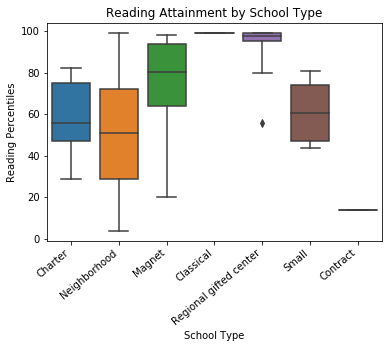

In [115]:
# Making boxplots for the reading/math percentiles by type of school (Data Exploration)
ax = sns.boxplot(x = 'school_type', y = 'attainment_reading_pct_es', data = merged_df, whis = 10)
ax.set(title = 'Reading Attainment by School Type', xlabel = 'School Type', ylabel = 'Reading Percentiles')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

[Text(0,0,'Charter'),
 Text(0,0,'Neighborhood'),
 Text(0,0,'Magnet'),
 Text(0,0,'Classical'),
 Text(0,0,'Regional gifted center'),
 Text(0,0,'Small'),
 Text(0,0,'Contract')]

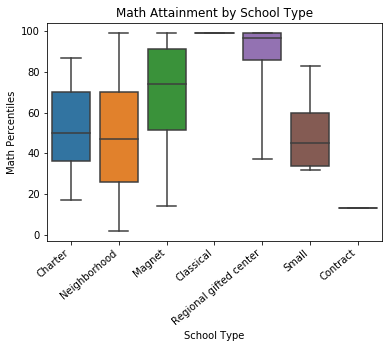

In [116]:
ax = sns.boxplot(x = 'school_type', y = 'attainment_math_pct_es', data = merged_df, whis = 10)
ax.set(title = 'Math Attainment by School Type', xlabel = 'School Type', ylabel = 'Math Percentiles')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [117]:
#Reducing from 7 labels to 3 labels by grouping similar labels in column 'school_type'.
#This is done to reduce the dimensionality of the dataset since 'school_type' is a nominal categorical variable.
mapper = {'Contract' : 'neighborhood', 
          'Neighborhood' : 'neighborhood',
          'Magnet' : 'magnet',
          'Regional gifted center' : 'magnet',
          'Classical' : 'magnet',
          'Charter' : 'charter',
          'Small' : 'charter'}

merged_df['school_type'] = merged_df['school_type'].replace(mapper)
merged_df.school_type.unique()

array(['charter', 'neighborhood', 'magnet'], dtype=object)

In [118]:
#Applying dummy coding scheme on 'school_type' since its a nominal categorical variable.
gen_dummy_features = pd.get_dummies(merged_df['school_type'], drop_first = True)

#Concatenating 'gen_dummy_features' with the dataset
merged_df = pd.concat([gen_dummy_features, merged_df], axis = 1)

#We can now drop 'school_type' column since its no longer required.
merged_df.drop('school_type', axis=1, inplace=True)

print("rows:",len(merged_df.index)) 
print("columns:",len(merged_df.columns))  #We now have 26 columns
merged_df.head()

rows: 429
columns: 26


,magnet,neighborhood,student_attainment_rating,attainment_reading_pct_es,attainment_math_pct_es,culture_climate_rating,creative_school_certification,school_survey_involved_families,school_survey_supportive_environment,school_survey_ambitious_instruction,school_survey_effective_leaders,school_survey_collaborative_teachers,school_survey_safety,student_attendance_year_1_pct,teacher_attendance_year_1_pct,chronic_truancy_pct,student_count_total,student_count_low_income,student_count_special_ed,student_count_english_learners,student_count_black,student_count_hispanic,student_count_white,student_count_asian,student_count_native_american,student_count_other_ethnicity
0,0,0,1,47.0,28.0,2,1,3,1,2,2,3,1,95.9,95.4,22.4,1068,1035,161,229,472,574,15,1,0,0
1,0,1,1,65.0,43.0,4,2,3,1,3,3,3,0,94.8,95.4,15.0,1133,1090,118,297,9,1083,22,4,7,0
2,1,0,2,93.0,94.0,4,3,4,2,3,4,4,2,96.6,96.1,11.2,446,158,32,38,143,120,62,106,1,0
3,0,1,0,38.0,31.0,4,3,3,2,4,3,3,1,95.4,95.5,41.5,349,321,33,6,338,7,3,0,0,0
4,0,1,1,52.0,61.0,4,0,3,3,3,2,3,3,95.1,94.8,27.2,560,519,95,278,20,463,37,17,17,0


In [119]:
merged_df.isna().sum()

magnet                                  0
neighborhood                            0
student_attainment_rating               0
attainment_reading_pct_es               0
attainment_math_pct_es                  0
culture_climate_rating                  0
creative_school_certification           0
school_survey_involved_families         0
school_survey_supportive_environment    0
school_survey_ambitious_instruction     0
school_survey_effective_leaders         0
school_survey_collaborative_teachers    0
school_survey_safety                    0
student_attendance_year_1_pct           0
teacher_attendance_year_1_pct           0
chronic_truancy_pct                     0
student_count_total                     0
student_count_low_income                0
student_count_special_ed                0
student_count_english_learners          0
student_count_black                     0
student_count_hispanic                  0
student_count_white                     0
student_count_asian               

## Data Exploration

In [120]:
# Reverse the mappings for the purposes of the graphs, then I'll change it back
#fit the labels into strings
mapper = {0 : 'BELOW AVERAGE', 
           1 : 'AVERAGE',
          2 : 'ABOVE AVERAGE'}

#update the column to be numeric. may cause warning, ignore. printing data.head() will show 
#the update goes through and not on a copy
merged_df['student_attainment_rating'] = merged_df['student_attainment_rating'].replace(mapper)

In [121]:
# Getting some Summary Statistics
merged_df.describe()

,magnet,neighborhood,attainment_reading_pct_es,attainment_math_pct_es,culture_climate_rating,creative_school_certification,school_survey_involved_families,school_survey_supportive_environment,school_survey_ambitious_instruction,school_survey_effective_leaders,school_survey_collaborative_teachers,school_survey_safety,student_attendance_year_1_pct,teacher_attendance_year_1_pct,chronic_truancy_pct,student_count_total,student_count_low_income,student_count_special_ed,student_count_english_learners,student_count_black,student_count_hispanic,student_count_white,student_count_asian,student_count_native_american,student_count_other_ethnicity
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.0
mean,0.109557,0.766900,55.967366,51.610723,2.890443,1.967366,2.755245,2.146853,3.226107,2.289044,2.596737,1.650350,94.879021,94.992075,23.379021,522.937063,410.993007,72.811189,119.750583,184.878788,241.055944,63.062937,22.715618,1.512821,0.0
std,0.312702,0.423299,25.568377,26.732842,1.278736,1.076016,0.863730,0.951816,0.731577,0.800348,0.908469,1.071675,1.327399,0.976155,14.462182,262.376385,236.853226,38.083274,146.461314,175.900658,287.537631,129.766265,75.294396,3.327589,0.0
min,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,84.700000,91.200000,0.000000,128.000000,20.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,37.000000,29.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,94.300000,94.400000,12.700000,329.000000,242.000000,45.000000,4.000000,23.000000,12.000000,1.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,56.000000,50.000000,4.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,1.000000,95.000000,95.000000,21.100000,458.000000,355.000000,65.000000,54.000000,150.000000,114.000000,5.000000,1.000000,1.000000,0.0
75%,0.000000,1.000000,78.000000,75.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,95.700000,95.600000,31.900000,660.000000,522.000000,92.000000,199.000000,308.000000,404.000000,49.000000,10.000000,2.000000,0.0
max,1.000000,1.000000,99.000000,99.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,98.200000,98.200000,69.700000,1508.000000,1294.000000,252.000000,748.000000,1078.000000,1355.000000,1018.000000,1020.000000,53.000000,0.0


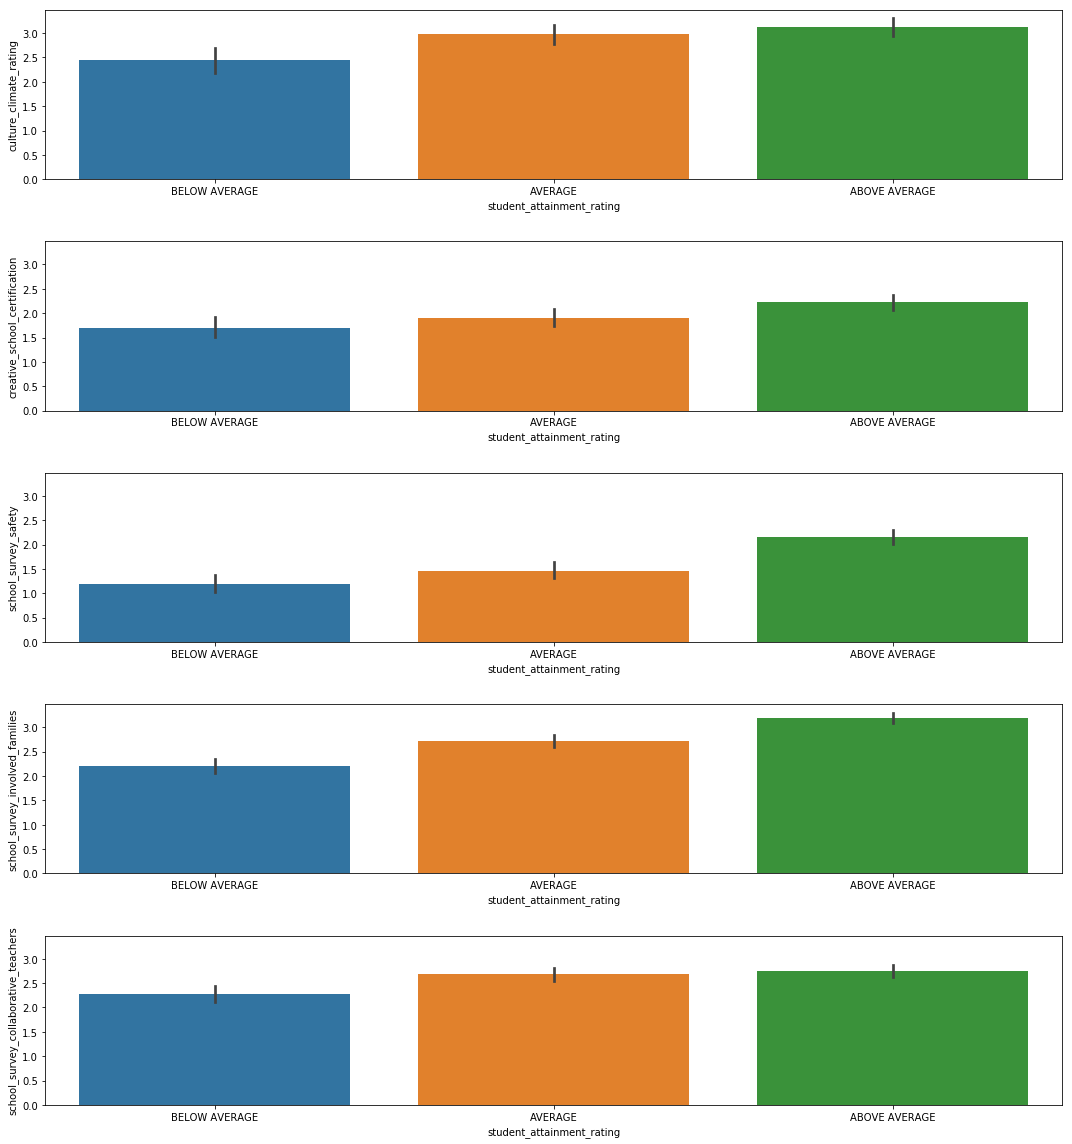

In [122]:
fig, axes = plt.subplots(5, 1, figsize = (15, 16), sharey=True)
sns.barplot(x = merged_df['student_attainment_rating'], y = merged_df['culture_climate_rating'], data = data, ax = axes[0], order = ['BELOW AVERAGE','AVERAGE', 'ABOVE AVERAGE'])
sns.barplot(x = merged_df['student_attainment_rating'], y = merged_df['creative_school_certification'], data = data, ax = axes[1], order = ['BELOW AVERAGE','AVERAGE', 'ABOVE AVERAGE'])
sns.barplot(x = merged_df['student_attainment_rating'], y = merged_df['school_survey_safety'], data = data, ax = axes[2], order = ['BELOW AVERAGE','AVERAGE', 'ABOVE AVERAGE'])
sns.barplot(x = merged_df['student_attainment_rating'], y = merged_df['school_survey_involved_families'], data = data, ax = axes[3], order = ['BELOW AVERAGE','AVERAGE', 'ABOVE AVERAGE'])
sns.barplot(x = merged_df['student_attainment_rating'], y = merged_df['school_survey_collaborative_teachers'], data = data, ax = axes[4], order = ['BELOW AVERAGE','AVERAGE', 'ABOVE AVERAGE'])
plt.tight_layout()

The graphs above show us that of the chosen attributes, it appears that 'school_survey_safety' (how safe a school is), 'creative_school_certification', (how the creativity of the school is rated), and 'school_survey_involved_families'(how involve dthe children's families are) seem to have to most drastic impact on setting apart schools that have student attainment ratings of below avergae, average, and above average

[Text(0,0.5,'Number of Students'),
 Text(0.5,0,'Student Attainment Rating'),
 Text(0.5,1,'Attainment Rating by Number of Students')]

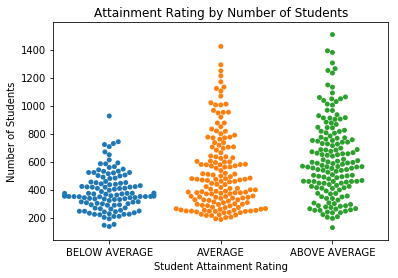

In [123]:
# Plot swarm plot for total student count
ax = sns.swarmplot(x = 'student_attainment_rating', y = 'student_count_total', data = merged_df,order = ['BELOW AVERAGE','AVERAGE', 'ABOVE AVERAGE'] )
ax.set(title = 'Attainment Rating by Number of Students', xlabel = 'Student Attainment Rating', ylabel = 'Number of Students' )

[Text(0,0.5,'Number of Low-Income Students'),
 Text(0.5,0,'Student Attainment Rating'),
 Text(0.5,1,'Attainment Rating by Number of Students')]

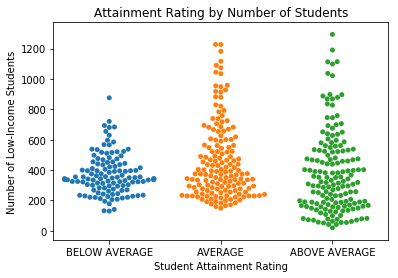

In [124]:
# Plot swarm plot for total student count
ax = sns.swarmplot(x = 'student_attainment_rating', y = 'student_count_low_income', data = merged_df,order = ['BELOW AVERAGE','AVERAGE', 'ABOVE AVERAGE'] )
ax.set(title = 'Attainment Rating by Number of Students', xlabel = 'Student Attainment Rating', ylabel = 'Number of Low-Income Students' )

In [125]:
#fit the labels into strings 
mapper = {0 : 'NOT YET ORGANIZED', 
          1 : 'PARTIALLY ORGANIZED', 
          2 : 'ORGANIZED',
          3 : 'MODERATELY ORGANIZED', 
          4 : 'WELL ORGANIZED'}

#update the column to be numeric. may cause warning, ignore. printing data.head() will show 
#the update goes through and not on a copy
data['culture_climate_rating'] = data['culture_climate_rating'].replace(mapper)

[Text(0,0,'NOT YET ORGANIZED'),
 Text(0,0,'PARTIALLY ORGANIZED'),
 Text(0,0,'ORGANIZED'),
 Text(0,0,'MODERATELY ORGANIZED'),
 Text(0,0,'WELL ORGANIZED')]

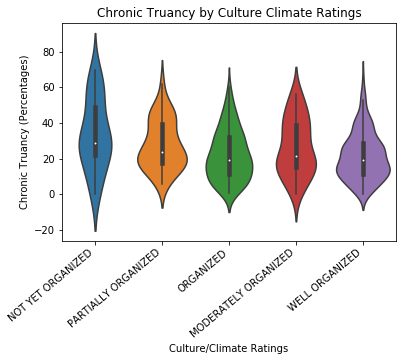

In [126]:
# Try getting violin plots for chronic truancy by culture_climate ratings
# Plot violin plot
ax = sns.violinplot(x = 'culture_climate_rating', y = 'chronic_truancy_pct', data = data, order = ['NOT YET ORGANIZED','PARTIALLY ORGANIZED','ORGANIZED','MODERATELY ORGANIZED','WELL ORGANIZED'])
ax.set(title = 'Chronic Truancy by Culture Climate Ratings', xlabel = 'Culture/Climate Ratings', ylabel = 'Chronic Truancy (Percentages)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

[Text(0,0.5,'Reading Attainment Percentile'),
 Text(0.5,0,'Teacher Attendance'),
 Text(0.5,1,'Teacher Attendance vs. Reading Attainment')]

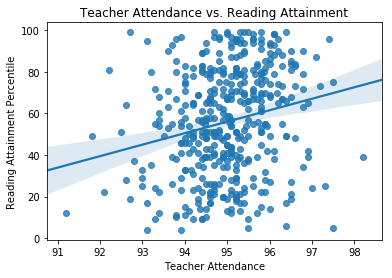

In [127]:
# Scatter plot to assess the relationship between teacher attendance and math and reading percentiles
ax = sns.regplot('teacher_attendance_year_1_pct', 'attainment_reading_pct_es', data = merged_df)
ax.set(title = 'Teacher Attendance vs. Reading Attainment', xlabel = 'Teacher Attendance', ylabel = 'Reading Attainment Percentile')

[Text(0,0.5,'Math Attainment Percentile'),
 Text(0.5,0,'Teacher Attendance'),
 Text(0.5,1,'Teacher Attendance vs. Math Attainment')]

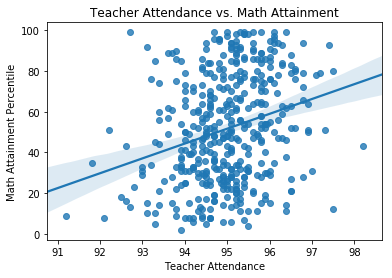

In [128]:
ax = sns.regplot('teacher_attendance_year_1_pct', 'attainment_math_pct_es', data = merged_df)
ax.set(title = 'Teacher Attendance vs. Math Attainment', xlabel = 'Teacher Attendance', ylabel = 'Math Attainment Percentile')

[Text(0,0.5,'Reading Attainment Percentile'),
 Text(0.5,0,'Chronic Truancy Percentage'),
 Text(0.5,1,'Truancy vs. Reading Attainment')]

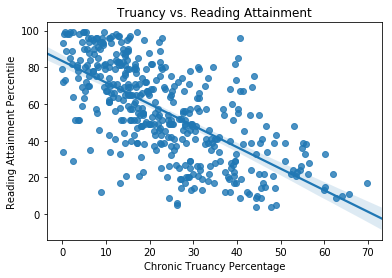

In [129]:
#How does chronic truancy impact the school's attainment percentiles?
ax = sns.regplot('chronic_truancy_pct', 'attainment_reading_pct_es', data = merged_df)
ax.set(title = 'Truancy vs. Reading Attainment', xlabel = 'Chronic Truancy Percentage', ylabel = 'Reading Attainment Percentile')

[Text(0,0.5,'Math Attainment Percentile'),
 Text(0.5,0,' Chronic Truancy Percentage'),
 Text(0.5,1,'Truancy vs. Math Attainment')]

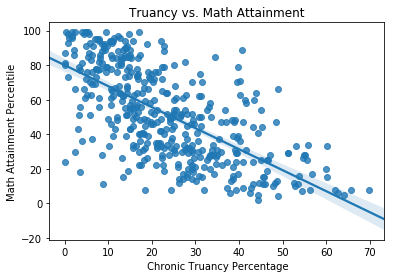

In [130]:
#How does chronic truancy impact the school's attainment percentiles?
ax = sns.regplot('chronic_truancy_pct', 'attainment_math_pct_es', data = merged_df)
ax.set(title = 'Truancy vs. Math Attainment', xlabel = ' Chronic Truancy Percentage', ylabel = 'Math Attainment Percentile')

Conclusions from the Data Exploration:
We should expect to see strong correlations with certain varibles as they seem to have an impact on the attainment ratings (in order of importance):
1. Attendance Metrics - (Teacher Attendance, Student Attendance, Chronic Truancy)
2. School Enviroment Metrics - (School Survey Safety, School Survey involved families, Culture/Climate Ratings, Creative School Certification)
3. Demographics - (Number of Low-Income Students, I would expect a multiple linear regression model with all the ethnicity information to give us a better understandign of how well ethnicity correlates to school attainment ratings..)



In [131]:
# Reverting Mappings for Modeling... 
#fit the labels into numeric 
mapper = {'NOT YET ORGANIZED': 0, 
          'PARTIALLY ORGANIZED' : 1, 
          'ORGANIZED' : 2,
          'MODERATELY ORGANIZED': 3, 
          'WELL ORGANIZED': 4}

#update the column to be numeric. may cause warning, ignore. printing data.head() will show 
#the update goes through and not on a copy
data['culture_climate_rating'] = data['culture_climate_rating'].replace(mapper)

In [132]:
#fit the labels into numeric 
mapper = {'BELOW AVERAGE' : 0, 
          'AVERAGE' : 1,
          'ABOVE AVERAGE' : 2}

#update the column to be numeric. may cause warning, ignore. printing data.head() will show 
#the update goes through and not on a copy
merged_df['student_attainment_rating'] = merged_df['student_attainment_rating'].replace(mapper)

## Data Modeling

In [133]:
#Partition data into training and test sets using holdout method
X_train, X_test, Y_train, Y_test = train_test_split(merged_df[['neighborhood', 'magnet', 'culture_climate_rating', 'creative_school_certification', 
                                                              'school_survey_involved_families', 'school_survey_supportive_environment', 
                                                              'school_survey_ambitious_instruction', 'school_survey_effective_leaders', 
                                                              'school_survey_collaborative_teachers', 'school_survey_safety', 
                                                              'student_attendance_year_1_pct', 'teacher_attendance_year_1_pct','chronic_truancy_pct',
                                                              'student_count_total', 'student_count_low_income', 'student_count_special_ed',
                                                              'student_count_english_learners', 'student_count_black', 'student_count_hispanic', 
                                                              'student_count_white', 'student_count_asian', 'student_count_native_american',
                                                              'student_count_other_ethnicity']], 
                                                    merged_df[['student_attainment_rating', 'attainment_reading_pct_es', 'attainment_math_pct_es']],
                                                    train_size = .80, test_size = .20, random_state = 1)

In [134]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 46 to 37
Data columns (total 23 columns):
neighborhood                            343 non-null uint8
magnet                                  343 non-null uint8
culture_climate_rating                  343 non-null int64
creative_school_certification           343 non-null int64
school_survey_involved_families         343 non-null int64
school_survey_supportive_environment    343 non-null int64
school_survey_ambitious_instruction     343 non-null int64
school_survey_effective_leaders         343 non-null int64
school_survey_collaborative_teachers    343 non-null int64
school_survey_safety                    343 non-null int64
student_attendance_year_1_pct           343 non-null float64
teacher_attendance_year_1_pct           343 non-null float64
chronic_truancy_pct                     343 non-null float64
student_count_total                     343 non-null int64
student_count_low_income                343 non-null int64
stud

In [135]:
#Standardizing training and test set
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## REGRESSION:

### Building multiple regression model to predict 'attainment_reading_pct_es'

In [136]:
#Using all predictors
model = linear_model.LinearRegression()
fitted_model1 = model.fit(X_train_scaled, Y_train['attainment_reading_pct_es'])

#Computing coefficient of determination(R squared) for test set 
score_test1 = fitted_model1.score(X_test_scaled, Y_test['attainment_reading_pct_es'])

#Computing Adjusted R2 for test set
adj_r_squared_test1 = 1 - (1-score_test1)*(len(Y_test)-1)/(len(Y_test) - X_test_scaled.shape[1]-1)

print("R-squared for test set:          " + str(score_test1))
print("Adjusted R-squared for test set: " + str(adj_r_squared_test1))

R-squared for test set:          0.7033211987251922
Adjusted R-squared for test set: 0.5932629337361506


In [137]:
#Use LASSO regression to see which predictors can be dropped.
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(X_train_scaled, Y_train['attainment_reading_pct_es'])
print(fitted_model.coef_)

[-3.3215892   1.92428402  0.          0.39825431  3.89801937 -0.
  0.         -0.         -0.          2.61211873  2.60257337  0.5708014
 -6.74140318  0.03108034 -0.         -0.          0.         -2.79194895
  0.          5.85273558  2.31092461  0.15634137  0.        ]


In [138]:
#Use Ridge regression to see which predictors can be dropped.
#Ridge regression alleviates multicollinearity among predictor variables by shrinking 
#the coeffiecient estimates of highly correlated variables.
model = linear_model.Ridge(alpha = 1)
fitted_model = model.fit(X_train_scaled, Y_train['attainment_reading_pct_es'])
print(fitted_model.coef_)

[-3.75492171  0.79177654  1.68745046  0.38712636  3.93884996 -3.99422947
  2.28953663 -1.36826705 -0.93396312  5.22858248  2.47850531  1.19390508
 -5.81866038  9.16644431 -9.44928787 -2.28200389  0.22170627 -2.27629035
  3.0056931   1.65499838  3.37061482  0.97931663  0.        ]


In [139]:
#Dropping indices [2,5,6,7,8,13,14,16,18,22] since the coefficients of those indices are 0.
model = linear_model.LinearRegression()
predictor_indices = [0,1,3,4,9,10,11,12,15,17,19,20,21]
fitted_model = model.fit(X_train_scaled[:,predictor_indices], Y_train['attainment_reading_pct_es'])

#Computing coefficient of determination(R squared) for test set 
score_test = fitted_model.score(X_test_scaled[:,predictor_indices], Y_test['attainment_reading_pct_es'])

#Computing Adjusted R2 for test set
adj_r_squared_test = 1 - (1-score_test)*(len(Y_test)-1)/(len(Y_test) - X_test_scaled.shape[1]-1)

print("R-squared for test set:          " + str(score_test))
print("Adjusted R-squared for test set: " + str(adj_r_squared_test)) 

R-squared for test set:          0.6857226301172858
Adjusted R-squared for test set: 0.5691358638704725


In [140]:
#Dropping indices [2,3,5,6,7,8,9,13,14,15,16,18,22]
model = linear_model.LinearRegression()
predictor_indices = [0,1,4,10,11,12,17,19,20,21]
fitted_model = model.fit(X_train_scaled[:,predictor_indices], Y_train['attainment_reading_pct_es'])

#Computing coefficient of determination(R squared) for test set 
score_test = fitted_model.score(X_test_scaled[:,predictor_indices], Y_test['attainment_reading_pct_es'])

#Computing Adjusted R2 for test set
adj_r_squared_test = 1 - (1-score_test)*(len(Y_test)-1)/(len(Y_test) - X_test_scaled.shape[1]-1)

print("R-squared for test set:          " + str(score_test))
print("Adjusted R-squared for test set: " + str(adj_r_squared_test)) 

R-squared for test set:          0.6710004903471609
Adjusted R-squared for test set: 0.5489522851533657


In [141]:
#Dropping indices [2,3,5,6,7,8,9,13,14,15,16,18,20,21,22] 
model = linear_model.LinearRegression()
predictor_indices = [0,1,4,10,11,12,17,19]
fitted_model = model.fit(X_train_scaled[:,predictor_indices], Y_train['attainment_reading_pct_es'])

#Computing coefficient of determination(R squared) for test set 
score_test = fitted_model.score(X_test_scaled[:,predictor_indices], Y_test['attainment_reading_pct_es'])

#Computing Adjusted R2 for test set
adj_r_squared_test = 1 - (1-score_test)*(len(Y_test)-1)/(len(Y_test) - X_test_scaled.shape[1]-1)

print("R-squared for test set:          " + str(score_test))
print("Adjusted R-squared for test set: " + str(adj_r_squared_test)) 

R-squared for test set:          0.6567898239928618
Adjusted R-squared for test set: 0.5294699199902138


### Building multiple regression model to predict ''attainment_math_pct_es''

In [142]:
#Using all predictors
model = linear_model.LinearRegression()
fitted_model1 = model.fit(X_train_scaled, Y_train['attainment_math_pct_es'])

#Computing coefficient of determination(R squared) for test set 
score_test1 = fitted_model1.score(X_test_scaled, Y_test['attainment_math_pct_es'])

#Computing Adjusted R2 for test set
adj_r_squared_test1 = 1 - (1-score_test1)*(len(Y_test)-1)/(len(Y_test) - X_test_scaled.shape[1]-1)

print("R-squared for test set:          " + str(score_test1))
print("Adjusted R-squared for test set: " + str(adj_r_squared_test1))

R-squared for test set:          0.6914883961715321
Adjusted R-squared for test set: 0.5770405431383908


In [143]:
#Use LASSO regression to see which predictors can be dropped.
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(X_train_scaled, Y_train['attainment_math_pct_es'])
print(fitted_model.coef_)

[-1.4829299   2.59061509  0.39739433  0.80729358  2.53771817 -0.
  0.          0.          0.          3.35030944  4.07842598  2.24740307
 -5.76564264  1.3509901  -0.         -0.          0.         -3.35202929
  0.          5.35799535  3.49858039  0.          0.        ]


In [144]:
#Use Ridge regression to see which predictors can be dropped.
#Ridge regression alleviates multicollinearity among predictor variables by shrinking 
#the coeffiecient estimates of highly correlated variables.
model = linear_model.Ridge(alpha = 1)
fitted_model = model.fit(X_train_scaled, Y_train['attainment_math_pct_es'])
print(fitted_model.coef_)

[-2.18046037  2.23331401  2.02215274  1.0836053   1.49835569 -2.64004698
  1.29368051 -1.58249206  1.32720299  5.24842762  4.13866202  2.85156897
 -4.85245917  7.20876242 -5.4442796  -1.54439596  0.22122079 -3.76829095
  1.72375257  2.98065609  4.36428332 -0.01582994  0.        ]


In [145]:
#Dropping indices [5,6,7,14,15,16,18,22] since the coefficients of those indices are 0.
model = linear_model.LinearRegression()
predictor_indices = [0,1,2,3,4,8,9,10,11,12,13,17,19,20,21]
fitted_model = model.fit(X_train_scaled[:,predictor_indices], Y_train['attainment_math_pct_es'])

#Computing coefficient of determination(R squared) for test set 
score_test = fitted_model.score(X_test_scaled[:,predictor_indices], Y_test['attainment_math_pct_es'])

#Computing Adjusted R2 for test set
adj_r_squared_test = 1 - (1-score_test)*(len(Y_test)-1)/(len(Y_test) - X_test_scaled.shape[1]-1)

print("R-squared for test set:          " + str(score_test))
print("Adjusted R-squared for test set: " + str(adj_r_squared_test)) 

R-squared for test set:          0.6831747456137085
Adjusted R-squared for test set: 0.5656427964058908


In [146]:
#Dropping indices [0,5,6,7,14,15,16,18,21,22] 
model = linear_model.LinearRegression()
predictor_indices = [1,2,3,4,8,9,10,11,12,13,17,19,20]
fitted_model = model.fit(X_train_scaled[:,predictor_indices], Y_train['attainment_math_pct_es'])

#Computing coefficient of determination(R squared) for test set 
score_test = fitted_model.score(X_test_scaled[:,predictor_indices], Y_test['attainment_math_pct_es'])

#Computing Adjusted R2 for test set
adj_r_squared_test = 1 - (1-score_test)*(len(Y_test)-1)/(len(Y_test) - X_test_scaled.shape[1]-1)

print("R-squared for test set:          " + str(score_test))
print("Adjusted R-squared for test set: " + str(adj_r_squared_test)) 

R-squared for test set:          0.6585917219356995
Adjusted R-squared for test set: 0.5319402639441042


In [147]:
#Dropping indices [0,2,3,5,6,7,8,9,14,15,16,18,20,21,22] 
model = linear_model.LinearRegression()
predictor_indices = [1,4,10,11,12,13,17,19]
fitted_model = model.fit(X_train_scaled[:,predictor_indices], Y_train['attainment_math_pct_es'])

#Computing coefficient of determination(R squared) for test set 
score_test = fitted_model.score(X_test_scaled[:,predictor_indices], Y_test['attainment_math_pct_es'])

#Computing Adjusted R2 for test set
adj_r_squared_test = 1 - (1-score_test)*(len(Y_test)-1)/(len(Y_test) - X_test_scaled.shape[1]-1)

print("R-squared for test set:          " + str(score_test))
print("Adjusted R-squared for test set: " + str(adj_r_squared_test)) 

R-squared for test set:          0.6366753266117918
Adjusted R-squared for test set: 0.501893592935521


In [148]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 46 to 37
Data columns (total 23 columns):
neighborhood                            343 non-null uint8
magnet                                  343 non-null uint8
culture_climate_rating                  343 non-null int64
creative_school_certification           343 non-null int64
school_survey_involved_families         343 non-null int64
school_survey_supportive_environment    343 non-null int64
school_survey_ambitious_instruction     343 non-null int64
school_survey_effective_leaders         343 non-null int64
school_survey_collaborative_teachers    343 non-null int64
school_survey_safety                    343 non-null int64
student_attendance_year_1_pct           343 non-null float64
teacher_attendance_year_1_pct           343 non-null float64
chronic_truancy_pct                     343 non-null float64
student_count_total                     343 non-null int64
student_count_low_income                343 non-null int64
stud

## CLASSIFICATION

In [149]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn import metrics

In [150]:
#isolate what we are interested in, which is the student_attainment_rating
classifier = GaussianNB()  

y5_train = Y_train['student_attainment_rating']
y5_test = Y_test['student_attainment_rating']

min_cols = 0
max_cols = len(X_train.columns)

max_precision = -100
best_precision_cols = []
best_precision_split = []
best_precision_jump = -100

max_recall = -100
best_recall_cols = []
best_recall_split = []
best_recall_jump = -100

max_f1_score = -100
best_f1_split = []
best_cols = []
best_f1_jump = -100

# #for every possible set of columns, get their evaluation metrics
jump = 1
for start_col in range(min_cols, max_cols-1): #from 0 to 22 in range
    for end_col in range(start_col+1, max_cols):#from 1 to 23 in range
        while jump != end_col: #we test intervals of variables too
            x5_train_scaled = X_train_scaled[:,start_col:end_col:jump]
            x5_test_scaled = X_test_scaled[:,start_col:end_col:jump]
            classifier.fit(x5_train_scaled, y5_train)
            y_pred = classifier.predict(x5_test_scaled)

            #get some evaluation metrics for the classifier
            accuracy = metrics.accuracy_score(y5_test, y_pred)
            error = 1 - accuracy
            #The labels that are not predicted at all are simply ignored by using 'labels = np.unique(y_pred)'
            #Doing this helps us to get rid of warnings
            precision = metrics.precision_score(y5_test, y_pred, average = None, labels = np.unique(y_pred))
            recall = metrics.recall_score(y5_test, y_pred, average = None, labels = np.unique(y_pred))
            F1_score = metrics.f1_score(y5_test, y_pred, average = None, labels = np.unique(y_pred))

            if max_precision <= sum(precision): #returns the last instance of best prec
                max_precision = sum(precision)
                best_precision_split = precision
                best_precision_jump = jump                
                best_precision_cols = [start_col, end_col]          

            if max_recall <= sum(recall): #returns the last instance of best recall
                max_recall = sum(recall)
                best_recall_split = recall
                best_recall_jump = jump
                best_recall_cols = [start_col, end_col]     

            if max_f1_score <= sum(F1_score): #returns the last instance of best f1 score
                max_f1_score = sum(F1_score)
                best_f1_split = F1_score
                best_f1_jump = jump
                best_cols = [start_col, end_col]
            jump = jump + 1
        jump = 1

#         print("\nStart and end cols:", [start_col, end_col],
#               "\nJump is:", jump,
#               "\nAccuracy:", accuracy,
#               "\nError:", error,
#               "\nPrecision:", precision,
#               "\nRecall:", recall,
#               "\nF1:", F1_score
#              )

print("\nBest summed precision:",max_precision, 
      "\nFrom columns:", best_precision_cols,
      "\nWith split:", best_precision_split,
      "\nAnd jump:", best_precision_jump      
     )
print("\nBest summed recall:",max_recall, 
      "\nFrom columns:", best_recall_cols,
      "\nWith split:", best_recall_split,
      "\nAnd jump:", best_recall_jump
     )
print("\nBest tot f1_score:", max_f1_score,
      "\nFrom columns:",best_cols,
      "\nWith split:",best_f1_split,
      "\nAnd jump:", best_f1_jump
     )


Best summed precision: 2.2153846153846155 
From columns: [3, 18] 
With split: [0.8        0.61538462 0.8       ] 
And jump: 1

Best summed recall: 2.23009009009009 
From columns: [3, 18] 
With split: [0.83333333 0.64       0.75675676] 
And jump: 1

Best tot f1_score: 2.2215552887821794 
From columns: [3, 18] 
With split: [0.81632653 0.62745098 0.77777778] 
And jump: 1


### Building classification model using Naive Baye's technique

Precision:  [0.8125     0.5        0.65909091]
Recall:  [0.54166667 0.52       0.78378378]
F1_score:  [0.65       0.50980392 0.71604938]
F1_score:  1.8758533042846768
[[13  7  4]
 [ 1 13 11]
 [ 2  6 29]]


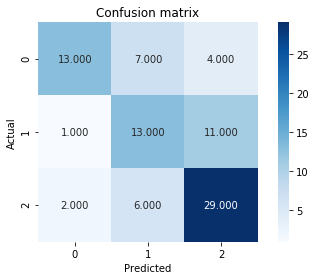

In [151]:
#Rebuilding the model with the best attributes that we found using above method 
#and printing its confusion matrix
predictor_indices = [8,12]
x5_train_scaled = X_train_scaled[:,predictor_indices]
x5_test_scaled = X_test_scaled[:,predictor_indices]
y5_train = Y_train['student_attainment_rating']
y5_test = Y_test['student_attainment_rating']

classifier = GaussianNB()  
classifier.fit(x5_train_scaled, y5_train)

Y_pred = classifier.predict(x5_test_scaled)
precision = metrics.precision_score(y5_test, Y_pred, average = None)
recall = metrics.recall_score(y5_test, Y_pred, average = None)           
F1_score = metrics.f1_score(y5_test, Y_pred, average = None )

print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", F1_score)
print("F1_score: ", sum(F1_score))

# Plot confusion matrix
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y5_test, Y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

We get a good F1_score sum using the above attributes which are 'school_survey_collaborative_teachers' and 'chronic_truancy_pct.' We can see from the confusion matrix, that it doesn't do a good job in predicting labels class 1(Average).

Precision:  [0.75       0.48       0.75675676]
Recall:  [0.75       0.48       0.75675676]
F1_score:  [0.75       0.48       0.75675676]
F1_score:  1.9867567567567566
[[18  6  0]
 [ 4 12  9]
 [ 2  7 28]]


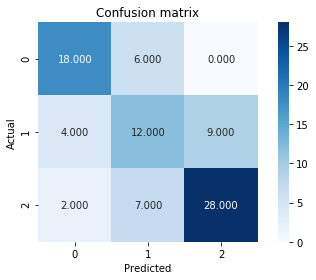

In [152]:
#Trying some more attributes with attribute 8 and 12 to see if we can improve our confusion matrix.
predictor_indices = [0,2,3,4,6,8,9,11,12,13]
x5_train_scaled = X_train_scaled[:,predictor_indices]
x5_test_scaled = X_test_scaled[:,predictor_indices]
y5_train = Y_train['student_attainment_rating']
y5_test = Y_test['student_attainment_rating']

classifier = GaussianNB()  
classifier.fit(x5_train_scaled, y5_train)

Y_pred = classifier.predict(x5_test_scaled)
precision = metrics.precision_score(y5_test, Y_pred, average = None)
recall = metrics.recall_score(y5_test, Y_pred, average = None)   
F1_score = metrics.f1_score(y5_test, Y_pred, average = None )

print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", F1_score)
print("F1_score: ", sum(F1_score))

# Plot confusion matrix
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y5_test, Y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

Precision:  [0.77777778 0.39285714 0.7       ]
Recall:  [0.58333333 0.44       0.75675676]
F1_score:  [0.66666667 0.41509434 0.72727273]
F1_score:  1.8090337335620355
[[14 10  0]
 [ 2 11 12]
 [ 2  7 28]]


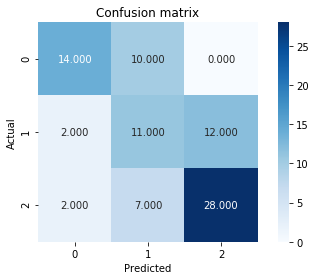

In [153]:
#Trying some more attributes with attribute 8 and 12 to see if we can improve our confusion matrix.
predictor_indices = [0,2,3,4,6,7,8,10,11,12,13]
x5_train_scaled = X_train_scaled[:,predictor_indices]
x5_test_scaled = X_test_scaled[:,predictor_indices]
y5_train = Y_train['student_attainment_rating']
y5_test = Y_test['student_attainment_rating']

classifier = GaussianNB()  
classifier.fit(x5_train_scaled, y5_train)

Y_pred = classifier.predict(x5_test_scaled)
precision = metrics.precision_score(y5_test, Y_pred, average = None)
recall = metrics.recall_score(y5_test, Y_pred, average = None)   
F1_score = metrics.f1_score(y5_test, Y_pred, average = None )


print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", F1_score)
print("F1_score: ", sum(F1_score))

# Plot confusion matrix
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y5_test, Y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

### Building classification model using K Nearest Neighbors method

In [154]:
#isolate what we are interested in, which is the student_attainment_rating
y5_train = Y_train['student_attainment_rating']
y5_test = Y_test['student_attainment_rating']

min_cols = 0
max_cols = len(X_train.columns)

max_precision = -100
best_precision_cols = []
best_precision_split = []
best_precision_neighbors = -100
best_precision_jump = -100

max_recall = -100
best_recall_cols = []
best_recall_split = []
best_recall_neighbors = -100
best_recall_jump = -100

max_f1_score = -100
best_f1_split = []
best_cols = []
best_f1_neighbors = -100
best_f1_jump = -100

jump = 1
#for every possible set of columns and neighbors 1-5, get their evaluation metrics
for start_col in range(min_cols, max_cols-1): #from 0 to 22 in range
    for end_col in range(start_col+1, max_cols):#from 1 to 23 in range
        while jump != end_col: #we test intervals of variables too        
            x5_train_scaled = X_train_scaled[:,start_col:end_col:jump]
            x5_test_scaled = X_test_scaled[:,start_col:end_col:jump]

            #for number of neighbors from 1 to 5
            for neighbors in range(1,6):
#                 print(start_col, end_col, jump, neighbors)
                classifier = KNeighborsClassifier(n_neighbors = neighbors)  
                classifier.fit(x5_train_scaled, y5_train)

                y_pred = classifier.predict(x5_test_scaled)

                #get some evaluation metrics for the classifier
                accuracy = metrics.accuracy_score(y5_test, y_pred)
                error = 1 - accuracy
                #The labels that are not predicted at all are simply ignored by using 'labels = np.unique(y_pred)'
                #Doing this helps us to get rid of warnings
                precision = metrics.precision_score(y5_test, y_pred, average = None, labels = np.unique(y_pred))
                recall = metrics.recall_score(y5_test, y_pred, average = None, labels = np.unique(y_pred))
                F1_score = metrics.f1_score(y5_test, y_pred, average = None, labels = np.unique(y_pred))

                if max_precision <= sum(precision): #returns the last instance of best prec
                    max_precision = sum(precision)
                    best_precision_split = precision
                    best_precision_neighbors = neighbors
                    best_precision_jump = jump
                    best_precision_cols = [start_col, end_col]          

                if max_recall <= sum(recall): #returns the last instance of best recall
                    max_recall = sum(recall)
                    best_recall_split = recall
                    best_recall_neighbors = neighbors     
                    best_recall_jump = jump                    
                    best_recall_cols = [start_col, end_col]     

                if max_f1_score <= sum(F1_score): #returns the last instance of best f1 score
                    max_f1_score = sum(F1_score)
                    best_f1_split = F1_score
                    best_f1_neighbors = neighbors
                    best_f1_jump = jump
                    best_cols = [start_col, end_col]

    #             print("\nStart and end cols:", [start_col, end_col],
    #                   "\nAccuracy:", accuracy,
    #                   "\nError:", error,
    #                   "\nPrecision:", precision,
    #                   "\nRecall:", recall,
    #                   "\nF1:", F1_score
    #                  )
            jump = jump + 1
        jump = 1

print("\nBest summed precision:",max_precision, 
      "\nUsing neighbors =", best_precision_neighbors,
      "\nFrom columns:", best_precision_cols,
      "\nWith split:", best_precision_split,
      "\nAnd jump:", best_precision_jump     
     )
print("\nBest summed recall:",max_recall, 
      "\nUsing neighbors =", best_recall_neighbors,      
      "\nFrom columns:", best_recall_cols,
      "\nWith split:", best_recall_split,
      "\nAnd jump:", best_recall_jump      
     )
print("\nBest tot f1_score:", max_f1_score,
      "\nUsing neighbors =", best_f1_neighbors,      
      "\nFrom columns:",best_cols,
      "\nWith split:",best_f1_split,
      "\nAnd jump:", best_f1_jump
     )            




Best summed precision: 2.320516795865633 
Using neighbors = 4 
From columns: [8, 22] 
With split: [0.88888889 0.51162791 0.92      ] 
And jump: 2

Best summed recall: 2.280315315315315 
Using neighbors = 5 
From columns: [7, 22] 
With split: [0.79166667 0.84       0.64864865] 
And jump: 3

Best tot f1_score: 2.2374149659863947 
Using neighbors = 5 
From columns: [7, 22] 
With split: [0.7755102  0.7        0.76190476] 
And jump: 3


Precision:  [0.82608696 0.52941176 0.79310345]
Recall:  [0.79166667 0.72       0.62162162]
F1_score:  [0.80851064 0.61016949 0.6969697 ]
F1_score:  2.115649826792993
[[19  3  2]
 [ 3 18  4]
 [ 1 13 23]]
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


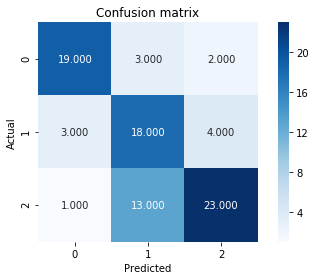

In [155]:
#Rebuilding the model with the best attributes in k-nearest-neighbors and printing its confusion matrix
predictor_indices = [12,13,14,15,16,17,18,19,20,21]
x5_train_scaled = X_train_scaled[:,predictor_indices]
x5_test_scaled = X_test_scaled[:,predictor_indices]
y5_train = Y_train['student_attainment_rating']
y5_test = Y_test['student_attainment_rating']

classifier = KNeighborsClassifier(n_neighbors = 5)  
classifier.fit(x5_train_scaled, y5_train)

Y_pred = classifier.predict(x5_test_scaled)
precision = metrics.precision_score(y5_test, Y_pred, average = None)
recall = metrics.recall_score(y5_test, Y_pred, average = None)
F1_score = metrics.f1_score(y5_test, Y_pred, average = None)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", F1_score)
print("F1_score: ", sum(F1_score))

# Plot confusion matrix
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y5_test, Y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

print(predictor_indices)

Precision:  [0.52       0.18518519 0.61764706]
Recall:  [0.54166667 0.2        0.56756757]
F1_score:  [0.53061224 0.19230769 0.5915493 ]
sum of F1_score:  1.3144692329802994
[[13  9  2]
 [ 9  5 11]
 [ 3 13 21]]
[0, 1, 2, 3, 4, 6, 8, 9, 11, 12, 13]


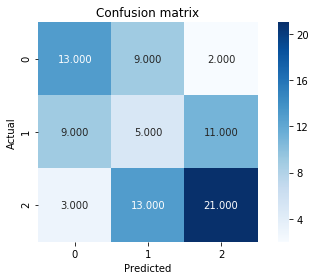

In [156]:
#Using the attributes that gave the best result for Naive Baye's.
predictor_indices = [0,1,2,3,4,6,8,9,11,12,13]
x5_train_scaled = X_train_scaled[:,predictor_indices]
x5_test_scaled = X_test_scaled[:,predictor_indices]
y5_train = Y_train['student_attainment_rating']
y5_test = Y_test['student_attainment_rating']

classifier = KNeighborsClassifier(n_neighbors = 5)  
classifier.fit(x5_train_scaled, y5_train)

Y_pred = classifier.predict(x5_test_scaled)
precision = metrics.precision_score(y5_test, Y_pred, average = None)
recall = metrics.recall_score(y5_test, Y_pred, average = None)
F1_score = metrics.f1_score(y5_test, Y_pred, average = None)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", F1_score)
print("sum of F1_score: ", sum(F1_score))

# Plot confusion matrix
# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y5_test, Y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

print(predictor_indices)

       The two classification methods involved were Naive Baye's and K nearest neighbors. Of the models we observed, Naive Baye's, using indices: 'school_survey_collaborative_teachers'and 'chronic_truancy_pct' provided us with the best f1 score. We used f1 score as our main measurement for deciding which model had the best performance since it accounts for both the precision and recall. Additionally, we had a sum of the f1 score to find which provided a maximal return on deciding all the three labels in our 'student_attainment_rating.' The performance of our best model has an f1 score of 0.85 on 0's(BELOW AVERAGE), 0.6785 on 1's(AVERAGE) and 0.7894 on 2's(ABOVE AVERAGE) respectively. For our variables, we enumerated through many combinations and selected the combination that gave us the best f1 score.
      
       The parameters of our k-nearest neighbors was switching the values of k from 1-5. No changes were made to the distance parameter, so Minkowski with p=2 (Euclidean) was kept from default. For our variables, we enumerated through many combinations and selected the combination that gave us the best f1 score.